In [1]:
import numpy as np
import pandas as pd 


from skimage import io

import matplotlib.pyplot as plt

import gabor_filters
from  gabor_filters import gabor_filter
from  gabor_filters import gabor_filter_response

# from gabor_filters.gabor_filter import GaborFilter as gb
# from gabor_filters.gabor_filter import GaborFilterBank as gbb

# from gabor_filters.gabor_filter_response import GaborFilterResponse as gbfr
# from gabor_filters.gabor_filter_response import GaborFilteredResponseBank as gbfrb

import importlib
importlib.reload(gabor_filters)
importlib.reload(gabor_filters.gabor_filter)
importlib.reload(gabor_filters.gabor_filter_response)

from gabor_filters.gabor_filter import GaborFilterBank as gbb
from gabor_filters.gabor_filter_response import GaborFilteredResponseBank as gbfrb

In [2]:
dfFoldTraining_1 = pd.read_csv('..//_inputs//_images_Zooscan//_Zooscan-training-fold_4.csv')
dfFoldTraining_1.index[dfFoldTraining_1['short_filenames'] == "0064-cop_calanoida_ptt.png"].tolist()

[11838]

([], [])

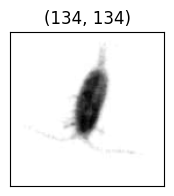

In [47]:
# read an image for testing
img = io.imread(dfFoldTraining_1["filenames"][11838])

plt.figure(figsize=(5,2))

plt.imshow(img,cmap='Greys_r')

plt.title(str(img.shape))
plt.xticks([])
plt.yticks([])

In [48]:
row = img.shape[0]
col = img.shape[1] # size of image
fmax = 0.327 # maximum frequency

k = np.sqrt(2) #frequency ratio or factor for selecting filter frequencies

p = 0.5 # crossing point between two consecutive filters, default 0.5
# pf = np.sqrt(0.99) #energy to include in the filters

u = 6 #number of frequencies
v = 8 #number of orientation

In [49]:

GaborFilterBank = gbb().create_a_set_of_gabor_filters(fmax, k, p, u, v, row, col, 0.5, 0.5)

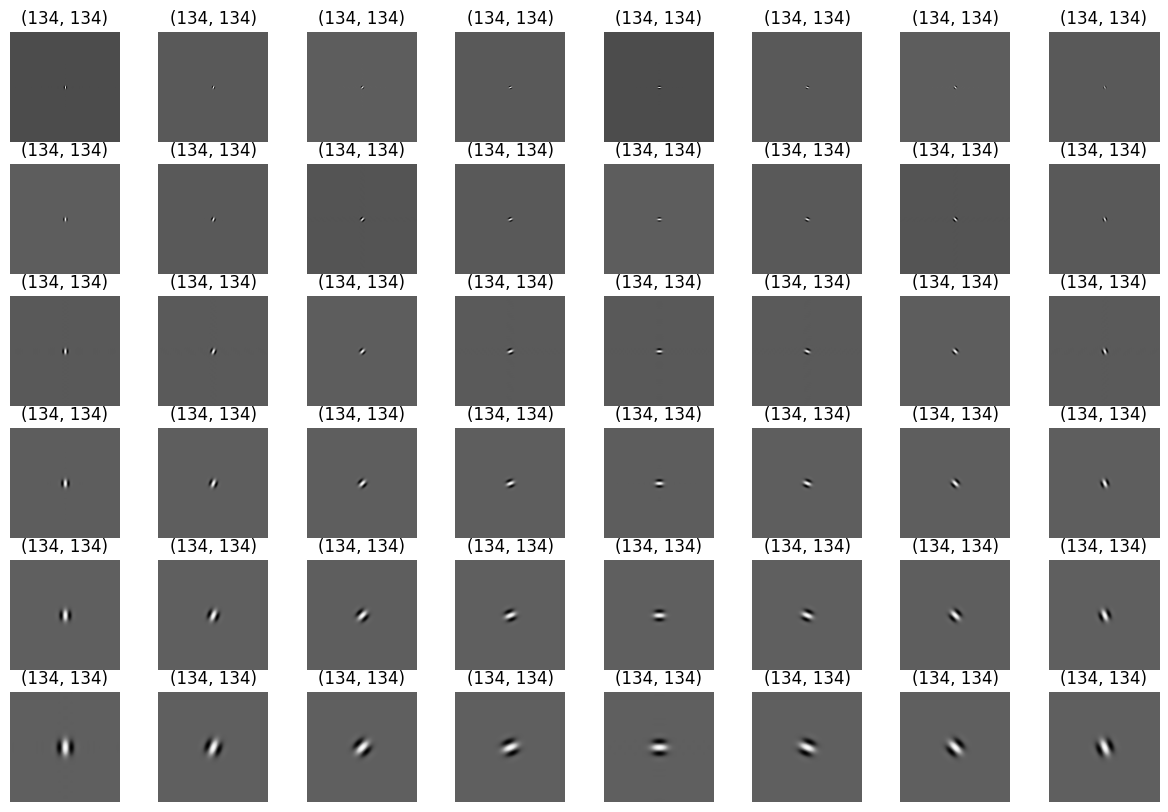

In [50]:
gbb().display_gabor_filter_bank_on_spatial_domain(GaborFilterBank, u, v, (15,10))

In [51]:
GaborFilteredReponses = gbfrb().create_a_set_of_Gabor_filtered_responses(img, GaborFilterBank)

In [52]:
meh = gbfrb().convert_a_set_Gabor_filtered_responses_to_ndarray(GaborFilteredReponses)

/home/centuri-mep-01/workspaces/jupyterlab/_Plankton_Zooscan-Machine_Learning/_pyscripts/gabor_filters/gabor_filter_response.py:242: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


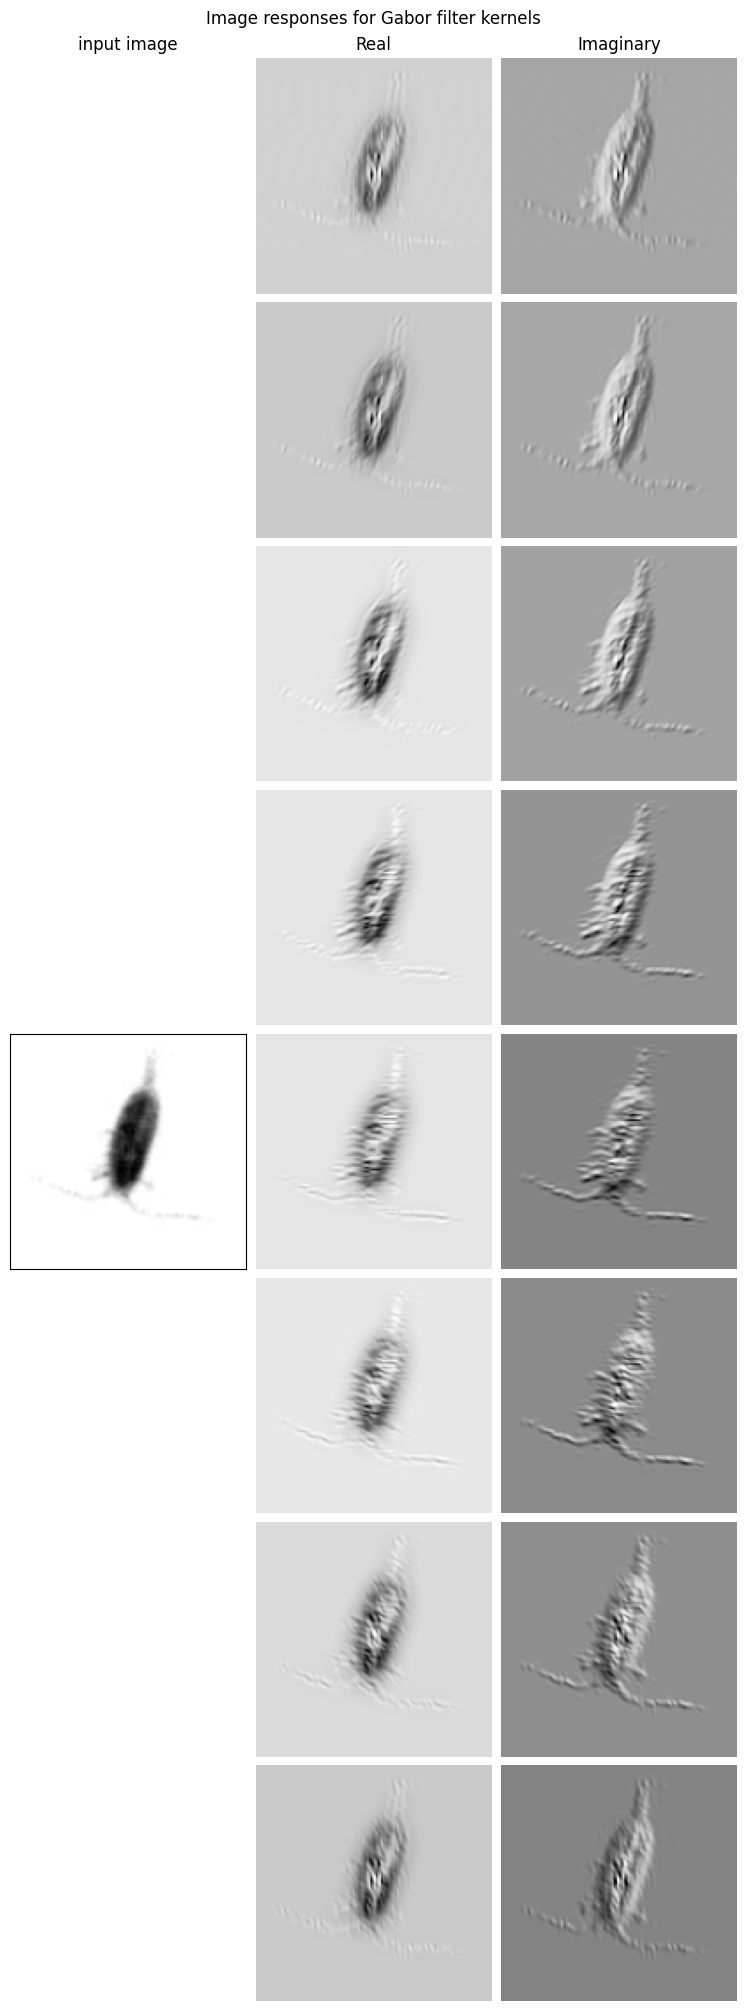

In [53]:
# with old code
gbfrb().display_image_with_its_responses(img, meh, 8, (15,20))

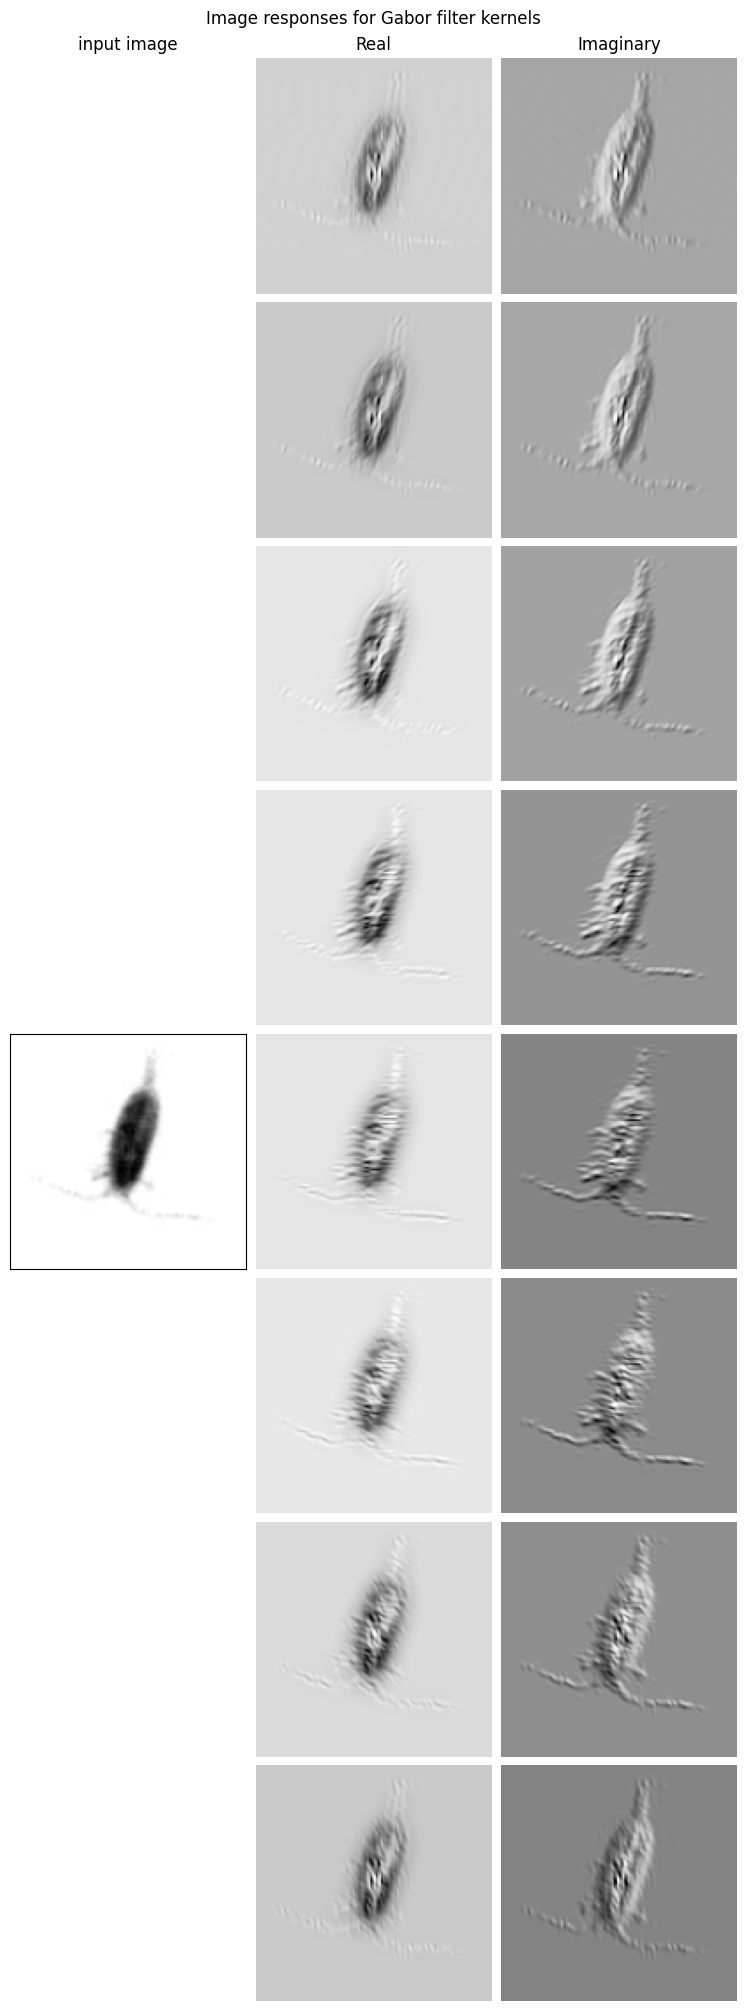

In [34]:
# with new codes ver 2
gbfrb().display_image_with_its_responses(img, meh, 8, (15,20))

/home/centuri-mep-01/workspaces/jupyterlab/_Plankton_Zooscan-Machine_Learning/_pyscripts/gabor_filters/gabor_filter_response.py:242: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


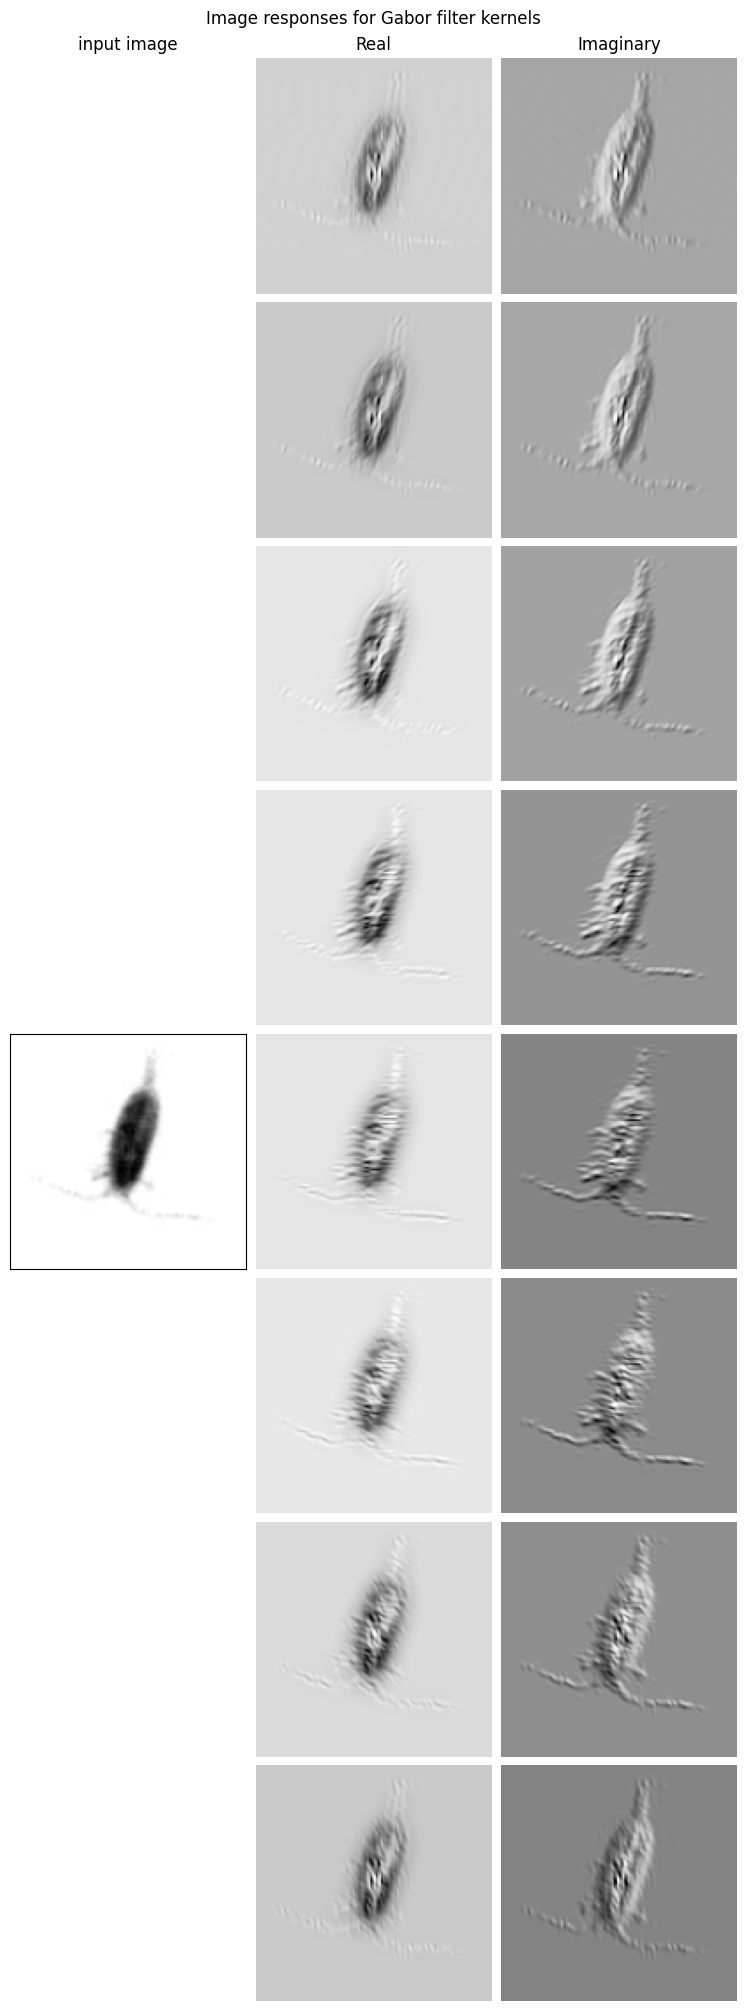

In [44]:
# with new codes ver 3
gbfrb().display_image_with_its_responses(img, meh, 8, (15,20))

([], [])

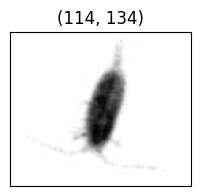

In [16]:
# read an image for testing
img = io.imread("0064-cop_calanoida_ptt_resized.png")[:,:,0]

plt.figure(figsize=(5,2))

plt.imshow(img,cmap='Greys_r')

plt.title(str(img.shape))
plt.xticks([])
plt.yticks([])

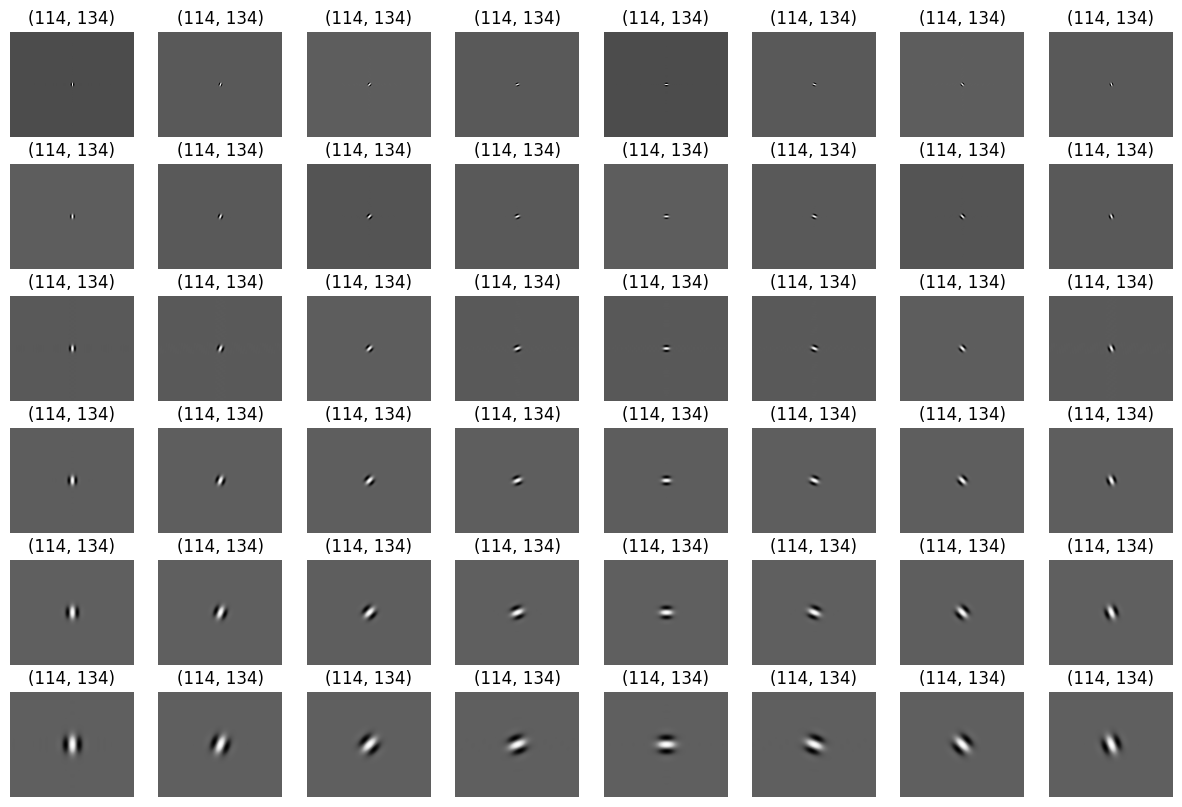

In [19]:
row = img.shape[0]
col = img.shape[1] # size of image

GaborFilterBank = gbb().create_a_set_of_gabor_filters(fmax, k, p, u, v, row, col, 0.5, 0.5)
gbb().display_gabor_filter_bank_on_spatial_domain(GaborFilterBank, u, v, (15,10))

In [20]:
GaborFilteredReponses = gbfrb().create_a_set_of_Gabor_filtered_responses(img, GaborFilterBank)
meh = gbfrb().convert_a_set_Gabor_filtered_responses_to_ndarray(GaborFilteredReponses)

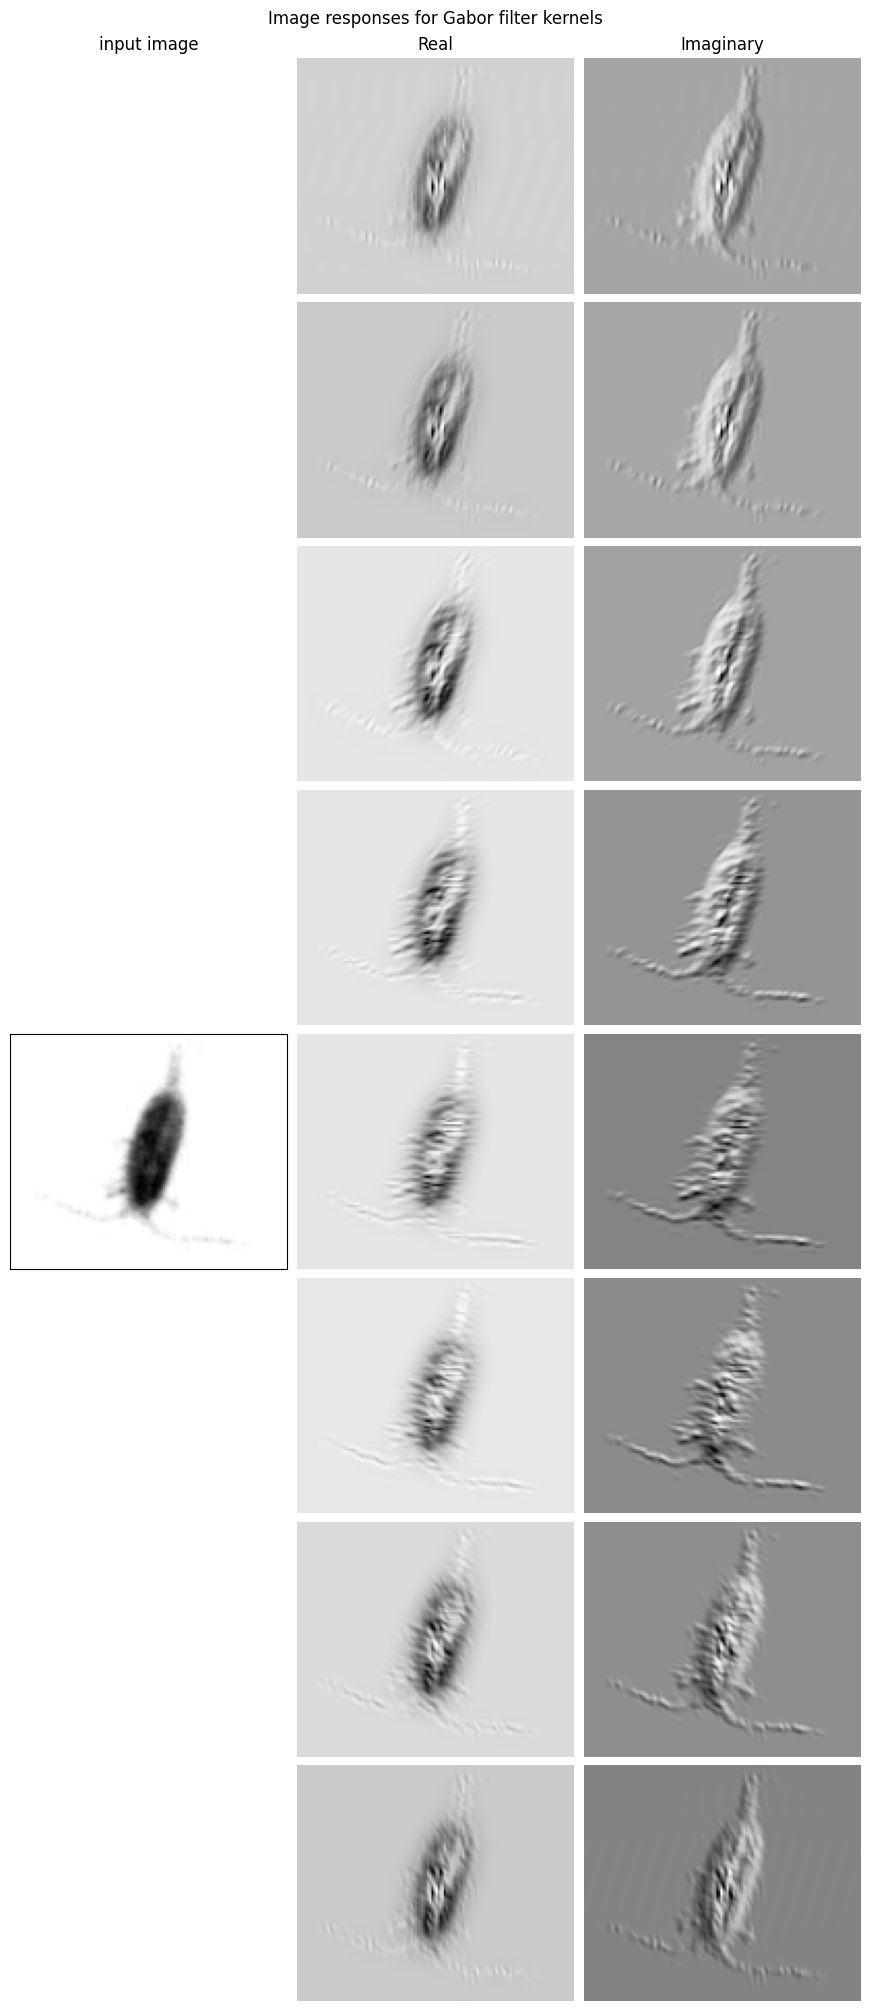

In [21]:
gbfrb().display_image_with_its_responses(img, meh, 8, (15,20))

In [22]:
meh

array([[[0.14433752+5.37299873e-08j, 0.14433752-5.32340518e-08j,
         0.14433753+4.01976015e-09j, ..., 0.14433654-7.84058142e-06j,
         0.14434248+2.03598208e-06j, 0.14432835+3.93923570e-06j],
        [0.14433755+4.32642525e-08j, 0.14433748-1.78628781e-08j,
         0.1443375 -1.05583445e-08j, ..., 0.14433799-6.18588920e-06j,
         0.14434182+2.56771372e-06j, 0.14432856+3.86807520e-06j],
        [0.14433751-4.38003697e-09j, 0.14433744-7.14517862e-09j,
         0.14433745+2.20765637e-08j, ..., 0.14433952-3.98369400e-06j,
         0.14434123+3.08544454e-06j, 0.14432901+2.68275250e-06j],
        ...,
        [0.1443385 +1.54051611e-08j, 0.14433853+3.64625645e-08j,
         0.14433855+1.48435840e-08j, ..., 0.14433435-1.07566952e-05j,
         0.14434255+5.57548639e-06j, 0.1443378 -4.96393263e-07j],
        [0.14433807+1.13313358e-08j, 0.14433814+2.85869720e-08j,
         0.14433809-2.56262015e-08j, ..., 0.14433466-9.65018031e-06j,
         0.14434355+3.17647360e-06j, 0.14433249+

In [38]:
np.mean(np.abs(meh[:,:,0]) )

0.13834976948994665

In [36]:
np.real(meh[:,:,0])

array([[0.14433752, 0.14433755, 0.14433751, ..., 0.1443385 , 0.14433807,
        0.14433767],
       [0.14433755, 0.14433793, 0.14433803, ..., 0.1443382 , 0.14433786,
        0.14433747],
       [0.14433787, 0.14433932, 0.14433908, ..., 0.14433773, 0.14433679,
        0.14433642],
       ...,
       [0.14433764, 0.14433748, 0.1443374 , ..., 0.14433871, 0.14433826,
        0.14433789],
       [0.14433762, 0.1443375 , 0.1443374 , ..., 0.14433861, 0.14433818,
        0.14433783],
       [0.14433756, 0.1443375 , 0.14433742, ..., 0.14433852, 0.14433808,
        0.14433773]])

In [37]:
np.abs(meh[:,:,0]) - np.real(meh[:,:,0])

array([[9.99200722e-15, 6.49480469e-15, 5.55111512e-17, ...,
        8.32667268e-16, 4.44089210e-16, 2.16493490e-15],
       [1.26779143e-12, 5.54278845e-13, 2.88657986e-15, ...,
        9.04831765e-15, 5.90916205e-14, 5.18501908e-13],
       [2.47031839e-11, 4.94979058e-12, 6.78568313e-13, ...,
        1.28647093e-13, 2.98927549e-14, 1.12800880e-11],
       ...,
       [2.77555756e-17, 8.32667268e-17, 2.49800181e-16, ...,
        2.22044605e-16, 5.55111512e-17, 0.00000000e+00],
       [1.38777878e-16, 1.66533454e-16, 2.77555756e-16, ...,
        2.49800181e-16, 0.00000000e+00, 1.38777878e-16],
       [4.99600361e-16, 3.05311332e-16, 1.94289029e-16, ...,
        1.66533454e-16, 8.32667268e-17, 5.55111512e-16]])

In [23]:
filteredImages = np.copy(meh)

In [27]:
nImages = filteredImages.shape[2]
display(nImages)

48

In [30]:
textureFeatures = np.zeros(nImages*2)
display(textureFeatures.shape)

(96,)

In [39]:
index=0
for i in range(0, nImages):
    textureFeatures[index] = np.mean(np.abs(filteredImages[:,:,i]));
    index = index + 1;
    textureFeatures[index] = np.std(np.abs(filteredImages[:,:,i]));
    index = index + 1;


In [40]:
textureFeatures

array([0.13834977, 0.01860813, 0.13832379, 0.01856315, 0.13806616,
       0.01871006, 0.13789422, 0.01882047, 0.13783686, 0.01895119,
       0.13777759, 0.01886333, 0.137815  , 0.01867424, 0.13805587,
       0.01861187, 0.13922792, 0.01776248, 0.1393088 , 0.01826601,
       0.13880387, 0.0183624 , 0.13837996, 0.01854137, 0.13821085,
       0.01872726, 0.13810526, 0.01870074, 0.13818926, 0.01834866,
       0.13863129, 0.01787716, 0.14102205, 0.01706497, 0.14151553,
       0.01784556, 0.14022988, 0.01775579, 0.13916563, 0.01799548,
       0.13872044, 0.01856811, 0.13857957, 0.01856477, 0.13883561,
       0.01778479, 0.13971438, 0.01664033, 0.14441191, 0.01853544,
       0.1454753 , 0.02105627, 0.14285127, 0.01761592, 0.14047581,
       0.01722636, 0.13955304, 0.01843453, 0.13940529, 0.01839276,
       0.13990271, 0.01700595, 0.14164656, 0.01604422, 0.15019861,
       0.0263395 , 0.15242383, 0.03030077, 0.14781064, 0.02226008,
       0.14263364, 0.01810342, 0.14077872, 0.01924302, 0.14055

# 3. Test with very large image in the dataset to check memory usage

In [3]:
dfFoldTraining_1 = pd.read_csv('..//_inputs//_images_Zooscan//_Zooscan-training-fold_1.csv')
img = io.imread(dfFoldTraining_1["filenames"][5993])
plt.figure(figsize=(5,2))

plt.imshow(img,cmap='Greys_r')

plt.title(str(img.shape))
plt.xticks([])
plt.yticks([])

([], [])

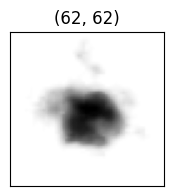

In [3]:
# read an image for testing
img = io.imread(dfFoldTraining_1["filenames"][5993])

plt.figure(figsize=(5,2))

plt.imshow(img,cmap='Greys_r')

plt.title(str(img.shape))
plt.xticks([])
plt.yticks([])

In [89]:
img = np.copy(cropped_image)

In [90]:
row = img.shape[0]
col = img.shape[1] # size of image
fmax = 0.327 # maximum frequency

k = np.sqrt(2) #frequency ratio or factor for selecting filter frequencies

p = 0.5 # crossing point between two consecutive filters, default 0.5
# pf = np.sqrt(0.99) #energy to include in the filters

u = 6 #number of frequencies
v = 8 #number of orientation

In [91]:

GaborFilterBank = gbb().create_a_set_of_gabor_filters(fmax, k, p, u, v, row, col, 0.5, 0.5)

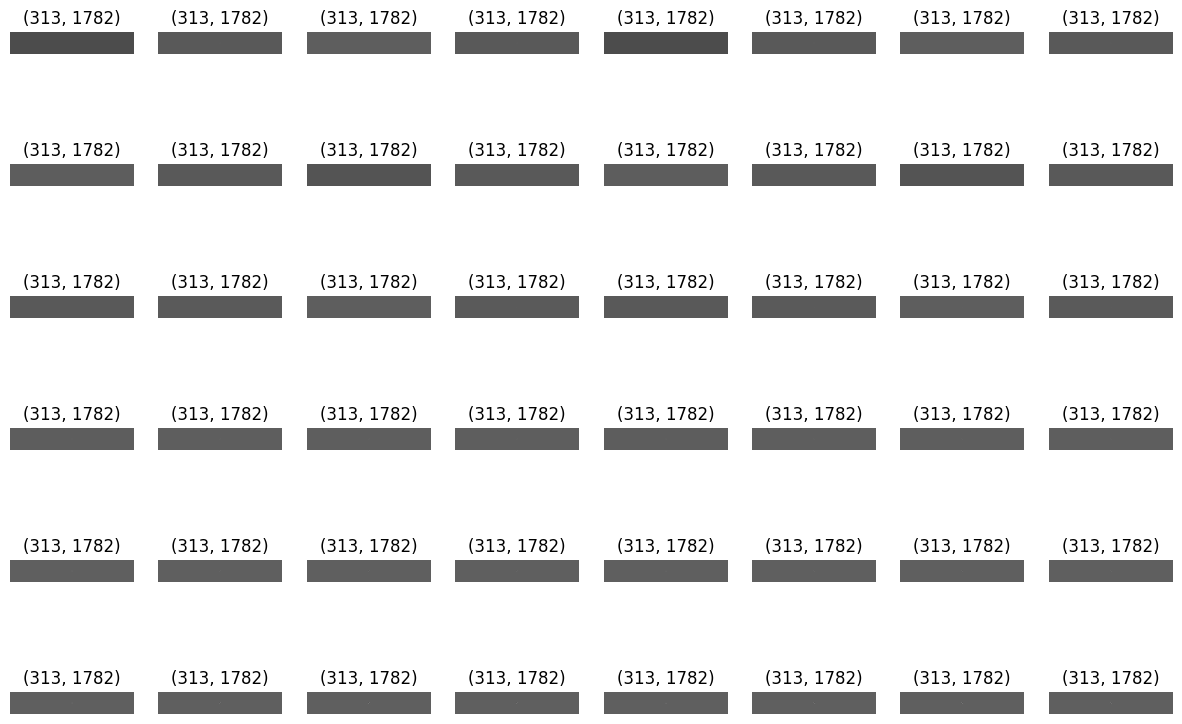

In [92]:
gbb().display_gabor_filter_bank_on_spatial_domain(GaborFilterBank, u, v, (15,10))

In [93]:
GaborFilteredReponses = gbfrb().create_a_set_of_Gabor_filtered_responses(img, GaborFilterBank)

In [94]:
meh = gbfrb().convert_a_set_Gabor_filtered_responses_to_ndarray(GaborFilteredReponses)

/home/centuri-mep-01/workspaces/jupyterlab/_Plankton_Zooscan-Machine_Learning/_pyscripts/gabor_filters/gabor_filter_response.py:242: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


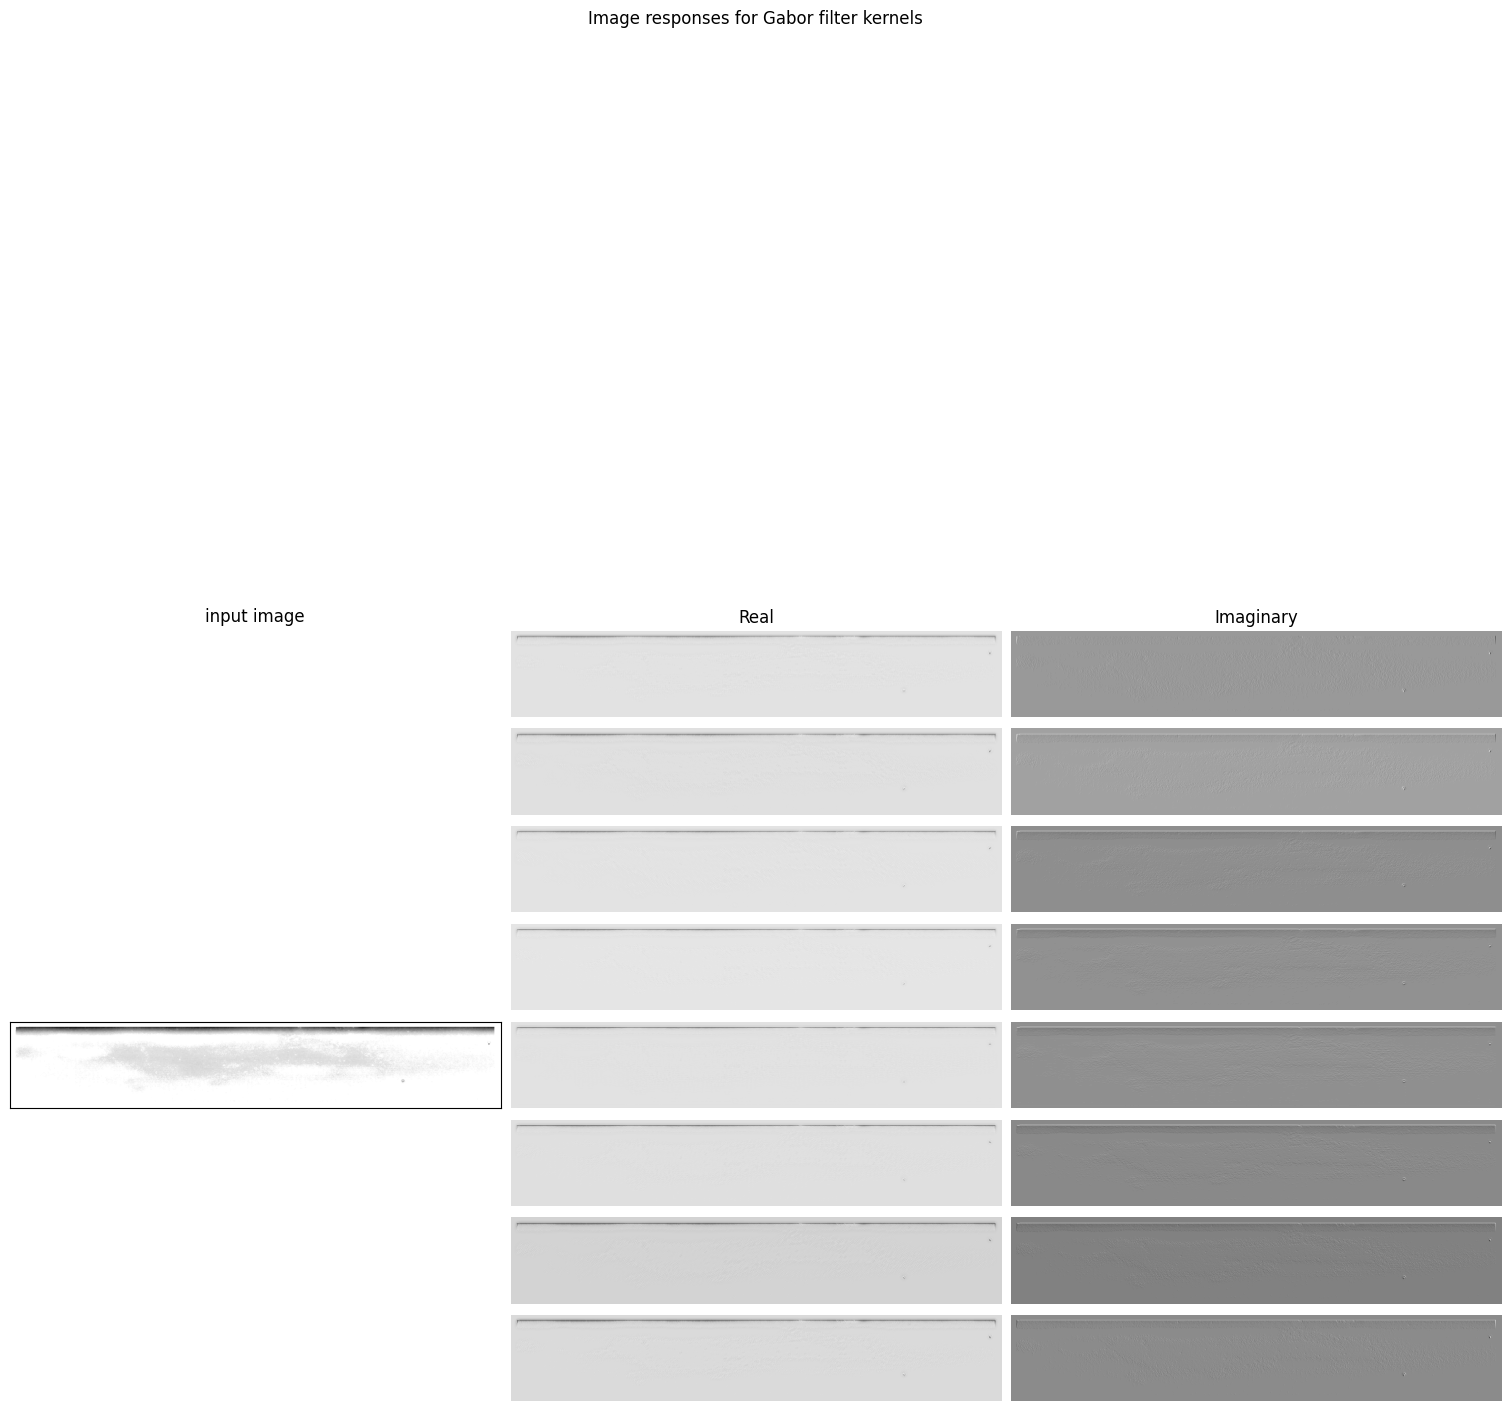

In [95]:
gbfrb().display_image_with_its_responses(img, meh, 8, (15,20))

In [4]:
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

([], [])

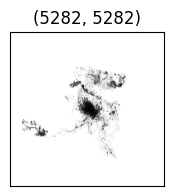

In [11]:
dfFoldTraining_1 = pd.read_csv('..//_inputs//_images_Zooscan//_Zooscan-training-fold_1.csv')
image = io.imread(dfFoldTraining_1["filenames"][5993])
plt.figure(figsize=(5,2))

plt.imshow(image,cmap='Greys_r')

plt.title(str(image.shape))
plt.xticks([])
plt.yticks([])

In [12]:
binary_global = image > threshold_otsu(image)

window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

(-0.5, 5281.5, 5281.5, -0.5)

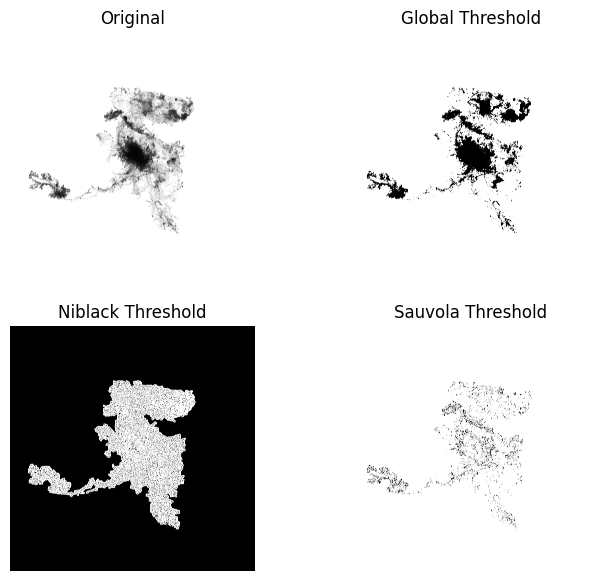

In [13]:

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

([], [])

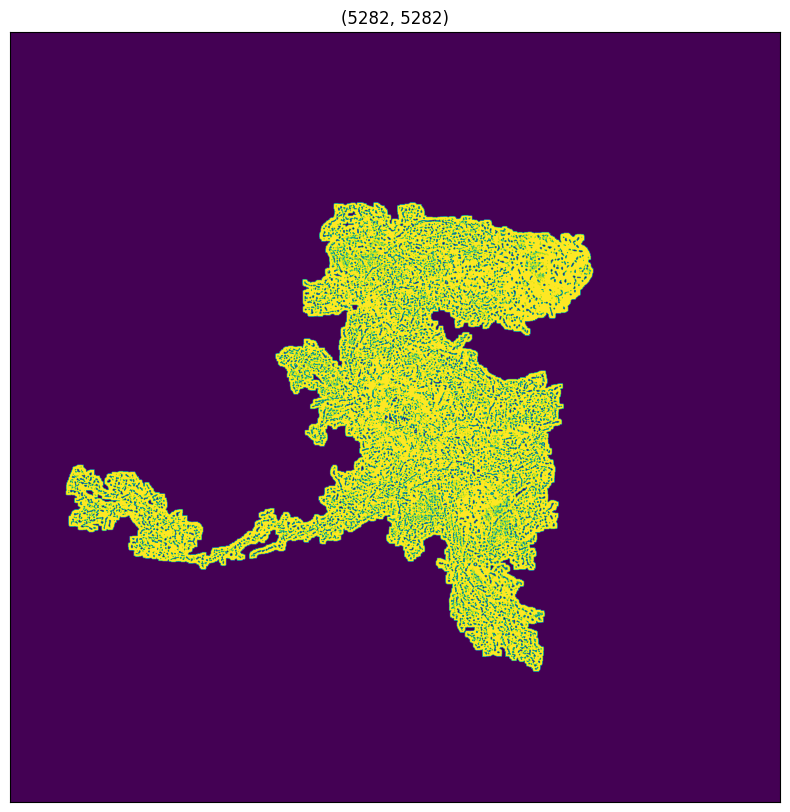

In [14]:
plt.figure(figsize=(10,10))

plt.imshow(np.pad(binary_niblack,1,'constant', constant_values=0))

plt.title(str(binary_niblack.shape))
plt.xticks([])
plt.yticks([])

In [15]:
from skimage.morphology import convex_hull_image

([], [])

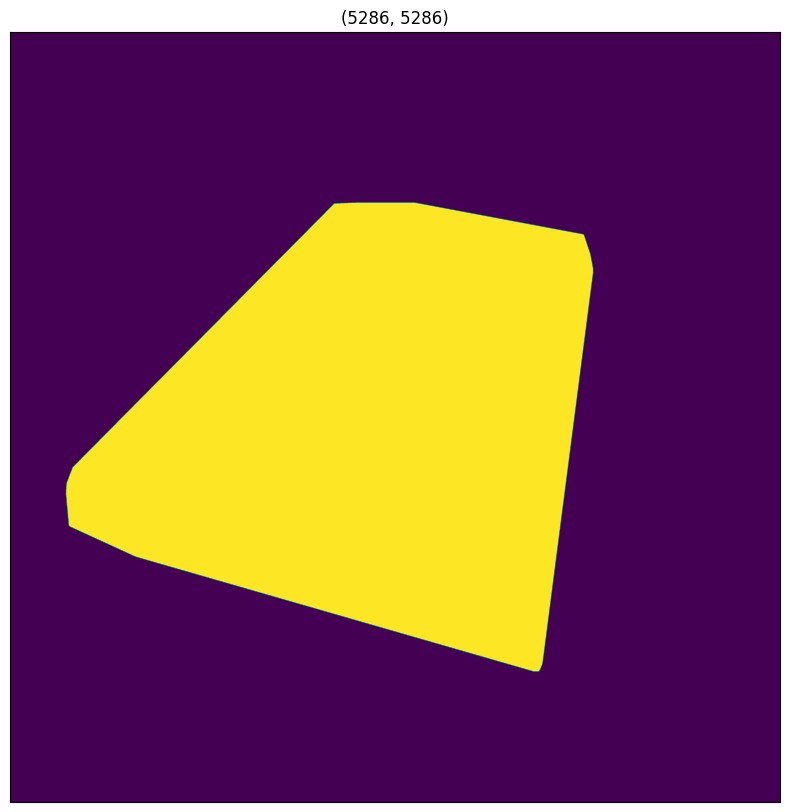

In [16]:
chull = convex_hull_image(np.pad(binary_niblack,2,'constant', constant_values=0))


plt.figure(figsize=(10,10))

plt.imshow(chull)

plt.title(str(chull.shape))
plt.xticks([])
plt.yticks([])

In [17]:
from skimage import measure
from skimage.util import invert

# Find the contours of the main object
contours = measure.find_contours(chull, 0.5)

# Find the largest contour (assumed to be the main object)
largest_contour = max(contours, key=len)

# Compute the bounding box coordinates for the largest contour
min_row, min_col = np.min(largest_contour, axis=0)
max_row, max_col = np.max(largest_contour, axis=0)



In [18]:
image.shape

(5282, 5282)

In [19]:
# Compute the optimal cropping dimensions based on the bounding box
padding = 10  # Adjust the padding as desired
crop_min_row = int(max(min_row - padding, 0))
crop_min_col = int(max(min_col - padding, 0))
crop_max_row = int(min(max_row + padding, image.shape[0]))
crop_max_col = int(min(max_col + padding, image.shape[1]))

In [20]:
display(crop_min_row, crop_min_col, crop_max_row, crop_max_col)

1160

374

4399

4012

In [21]:


# Crop the image using the computed dimensions
cropped_image = image[crop_min_row:crop_max_row, crop_min_col:crop_max_col]

([], [])

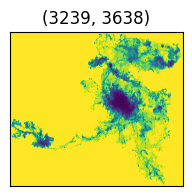

In [22]:
plt.figure(figsize=(5,2))

plt.imshow(cropped_image)

plt.title(str(cropped_image.shape))
plt.xticks([])
plt.yticks([])

([], [])

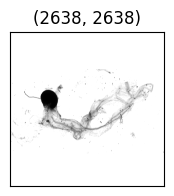

In [58]:
plt.figure(figsize=(5,2))

plt.imshow(image)

plt.title(str(image.shape))
plt.xticks([])
plt.yticks([])

In [45]:
from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon

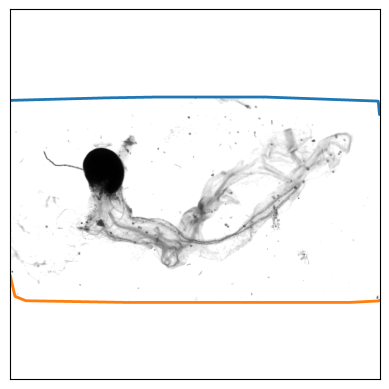

In [59]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [50]:
len(contours)

2